In [1]:
##approach_1 by sagnik aka dodo
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('synthetic_mental_health_dataset.csv')

In [3]:
df.sample()

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,diet_quality,weather,mood_score,stress_level
118,8.714234,0.0,8.074508,2,8,10.0,1.073437,0,poor,rainy,7.68481,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sleep_hours          2000 non-null   float64
 1   screen_time          2000 non-null   float64
 2   exercise_minutes     2000 non-null   float64
 3   daily_pending_tasks  2000 non-null   int64  
 4   interruptions        2000 non-null   int64  
 5   fatigue_level        2000 non-null   float64
 6   social_hours         2000 non-null   float64
 7   coffee_cups          2000 non-null   int64  
 8   diet_quality         2000 non-null   object 
 9   weather              2000 non-null   object 
 10  mood_score           2000 non-null   float64
 11  stress_level         2000 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 187.6+ KB


In [5]:
df.head()

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,diet_quality,weather,mood_score,stress_level
0,7.745071,3.649643,13.272466,1,5,4.179955,2.448854,1,average,snowy,9.171062,1.000000
1,6.792604,4.710963,1.785436,3,6,4.883679,1.330623,3,good,sunny,5.706491,3.558516
2,7.971533,3.415160,71.843325,4,10,4.207812,2.134120,0,poor,cloudy,10.000000,2.971450
3,9.284545,4.384077,14.596656,2,4,3.362592,1.857070,0,good,sunny,8.385038,1.000000
4,6.648770,1.212771,19.048010,3,5,6.229107,2.642980,1,poor,rainy,10.000000,1.639047


In [6]:
df.tail()

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,diet_quality,weather,mood_score,stress_level
1995,8.605225,5.056915,13.765823,3,3,8.362518,3.113966,2,poor,snowy,8.765375,1.086619
1996,6.960218,0.844376,3.364650,2,7,4.869502,3.775442,0,good,rainy,7.796204,1.000000
1997,5.677188,4.359404,4.040437,6,1,7.494879,2.678349,0,average,snowy,4.701231,3.733475
1998,6.755400,8.286756,9.084104,3,1,5.045832,1.955221,2,average,cloudy,6.170718,1.000000
1999,5.882646,5.721296,11.328076,3,3,6.874822,2.187892,0,poor,sunny,5.999456,1.000000


In [7]:
#checking is no of duplicated rows
df[df.duplicated()]

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,diet_quality,weather,mood_score,stress_level


In [8]:
#if I got any then i would use the below code
df.drop_duplicates(inplace=True)

In [9]:
# listing all number columns by numerical_cols and categorical_cols by categorical_cols
numerical_cols = df.dtypes[df.dtypes != 'object'].index.tolist()
categorical_cols = df.dtypes[df.dtypes == 'object'].index.tolist()

In [10]:
df[numerical_cols].corr()

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,mood_score,stress_level
sleep_hours,1.000000,-0.018253,-0.044957,-0.020266,0.020075,0.019656,-0.028364,-0.010743,0.160510,-0.299987
screen_time,-0.018253,1.000000,0.033443,0.000687,-0.000746,-0.044424,0.009172,-0.021468,-0.287830,-0.001215
exercise_minutes,-0.044957,0.033443,1.000000,-0.006550,0.013778,0.022317,0.018532,0.016574,0.702350,0.011245
daily_pending_tasks,-0.020266,0.000687,-0.006550,1.000000,0.008208,0.006637,0.026906,-0.021208,-0.008746,0.798292
interruptions,0.020075,-0.000746,0.013778,0.008208,1.000000,-0.014940,0.001267,-0.008508,0.012302,0.284151
fatigue_level,0.019656,-0.044424,0.022317,0.006637,-0.014940,1.000000,0.029126,0.026313,-0.096589,0.077554
social_hours,-0.028364,0.009172,0.018532,0.026906,0.001267,0.029126,1.000000,-0.002541,0.028679,0.013869
coffee_cups,-0.010743,-0.021468,0.016574,-0.021208,-0.008508,0.026313,-0.002541,1.000000,0.010891,0.063265
mood_score,0.160510,-0.287830,0.702350,-0.008746,0.012302,-0.096589,0.028679,0.010891,1.000000,-0.065135
stress_level,-0.299987,-0.001215,0.011245,0.798292,0.284151,0.077554,0.013869,0.063265,-0.065135,1.000000


In [11]:
df.describe()

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,mood_score,stress_level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.067237,4.990009,19.868516,2.948500,5.131000,4.996769,2.001369,0.989500,7.741658,2.129647
std,1.481299,2.002973,20.071066,1.725206,2.278472,2.000430,0.959934,1.012869,2.023962,1.482866
min,2.138099,0.000000,0.004821,0.000000,0.000000,0.000000,0.000000,0.000000,1.493465,1.000000
25%,6.066007,3.581748,5.580022,2.000000,3.000000,3.647335,1.304384,0.000000,6.090860,1.000000
50%,7.067037,4.999893,13.289737,3.000000,5.000000,4.956565,1.996521,1.000000,7.846064,1.397094
75%,8.024466,6.331087,28.118005,4.000000,7.000000,6.320355,2.653096,2.000000,10.000000,2.932065
max,12.000000,12.852475,150.504069,10.000000,15.000000,10.000000,5.505871,6.000000,10.000000,9.684702


In [12]:
X_encoded = pd.get_dummies(X,columns=categorical_cols,drop_first=True)

NameError: name 'X' is not defined

In [13]:
coefficients = pd.DataFrame({'Feature': X_encoded.columns,'Coefficient': model.coef_}).sort_values(by='Coefficient', ascending=False)
coefficients.head()

NameError: name 'X_encoded' is not defined

In [14]:
features = {'sleep_hours', 'screen_time','exercise_minutes','daily_pending_tasks', 'interruptions', 'fatigue_level',
    'social_hours', 'stress_level', 'coffee_cups',
    'sleep_exercise_ratio', 'work_stress_load',
    'wellness_score', 'social_engagement'}

In [15]:
X = df.drop('sleep_hours', axis=1)   
y = df['sleep_hours']

In [16]:
#train_test_spliting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

In [17]:
y_pred = model.predict(X_encoded)
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y, y_pred))

NameError: name 'model' is not defined

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
model = LinearRegression()
model.fit(X_encoded, y)

NameError: name 'X_encoded' is not defined

In [20]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

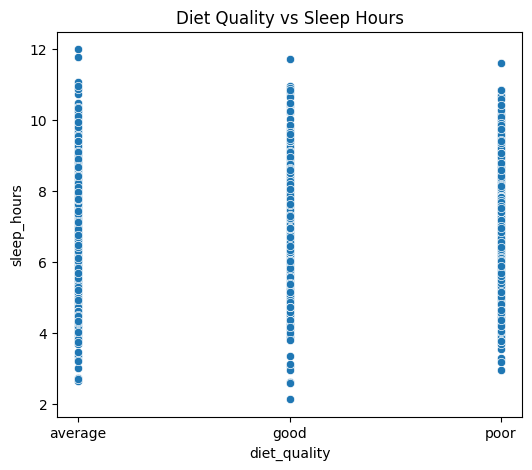

In [21]:
# before regression
plt.figure(figsize=(6,5))
sns.scatterplot(x='diet_quality', y='sleep_hours', data=df)
plt.title("Diet Quality vs Sleep Hours")
plt.show()

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(X_encoded.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap After Encoding")
plt.show()

NameError: name 'X_encoded' is not defined

<Figure size 1200x800 with 0 Axes>